In [1]:
!pip install arcpy

ERROR: Could not find a version that satisfies the requirement arcpy (from versions: none)
ERROR: No matching distribution found for arcpy


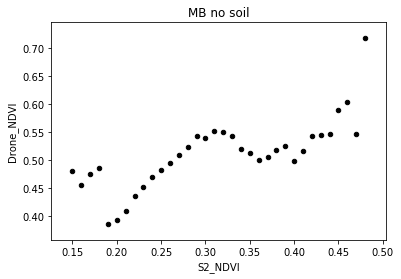

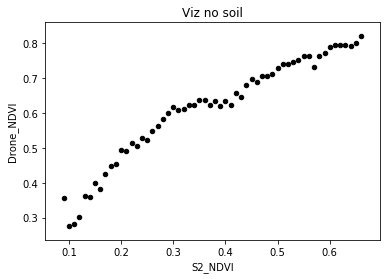

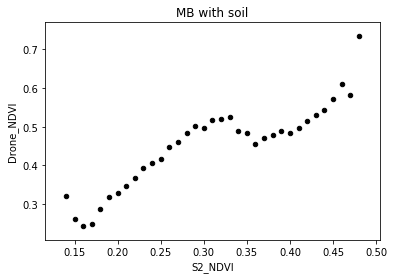

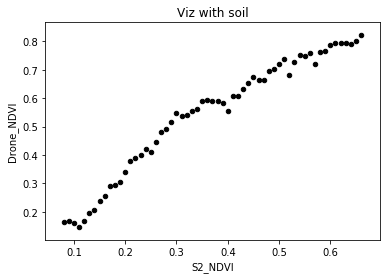

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#data with no soil pixels
df_MB_no_soil=pd.read_excel('C:\\articles\\to_upload\\masked\\MB_no_soil_grouped_ndvi.xls')
df_viz_no_soil=pd.read_excel('C:\\articles\\to_upload\\masked\\Vizcarra_no_soil_grouped_NDVI.xls')

#data with soil pixels
df_MB_with_soil=pd.read_excel('C:\\articles\\to_upload\\unmasked\\MB_unmasked_grouped_ndvi.xls')
df_viz_with_soil=pd.read_excel('C:\\articles\\to_upload\\unmasked\\Vizcarra_unmasked_grouped_NDVI.xls')

#df = pd.read_excel('C:\\articles\\to_upload\\masked\\ZonalSt_MB_no_soil_TableToExcel.xls')
#C:\articles\to_upload\Vizcarra
#print(df)

# a scatter plot comparing num_children and num_pets
df_MB_no_soil.plot(kind='scatter',x='S2_NDVI',y='Drone_NDVI',color='black', title="MB no soil")
plt.show()

df_viz_no_soil.plot(kind='scatter',x='S2_NDVI',y='Drone_NDVI',color='black', title="Viz no soil")
plt.show()

df_MB_with_soil.plot(kind='scatter',x='S2_NDVI',y='Drone_NDVI',color='black', title="MB with soil")
plt.show()

df_viz_with_soil.plot(kind='scatter',x='S2_NDVI',y='Drone_NDVI',color='black', title="Viz with soil")
plt.show()

In [28]:

#y=np.atleast_2d(y)

print(X.shape,y.shape)

(34, 1) (34,)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Y_test=y[2955:3940]
print(X_train.shape, y_train.shape, X_test.shape)

(22, 1) (22,) (12, 1)


In [30]:
#X_train=np.resize(np.array([1,2,3,4,5,6,7,8]),(8,1))
#Y_train=np.resize(np.array([5,10,15,20,25,30,34,42]),(8,1))
#X_test=np.resize(np.array([12,14,15,16,17]),(5,1))

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [32]:
# Instantiate a Gaussian Process model
list_of_kernels=[]
list_of_datasets=[]

kernel1 = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
kernel2 = DotProduct() + WhiteKernel()


gp_NDVI = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp_NDVI.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [ ]:
def try_kernels(kernels,datasets): 
    for kernel in kernels: 
        for dataset in datasets: 
            X_raw = (df["S2_NDVI"].to_numpy())
            #print(X_raw.shape)
            X=np.reshape(X_raw,(X_raw.shape[0], 1))
            y=(df["Drone_NDVI"].to_numpy()).ravel()

            gp = 

0.6192913658342691


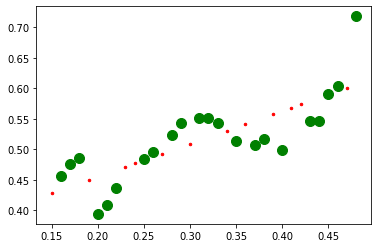

In [33]:

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp_NDVI.predict(X_test, return_std=True)
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
#plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X_train, y_train, 'g.', markersize=20, label='Observations' )
plt.plot(X_test, y_pred, 'r.', markersize=5, label='Prediction , R square = '+str(gp_NDVI.score(X_train, y_train)))
print(gp_NDVI.score(X_train, y_train))
#plt.fill(np.concatenate([X_test, X_test[::-1]]),
        # np.concatenate([y_pred - 1.9600 * sigma,
                        #(y_pred + 1.9600 * sigma)[::-1]]),
         #alpha=.5, fc='b', ec='None', label='95% confidence interval')

In [7]:
import pickle

with open('gp_model.pkl','wb') as f:
    pickle.dump(gp_NDVI,f)

# load
with open('gp_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)



In [19]:
print(gp_NDVI)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)


In [7]:
openpyxl

NameError: name 'openpyxl' is not defined

In [8]:
X_test.shape, y_pred.shape

((500, 1), (500,))

In [12]:
df_y_predicted_vizcarra_unmasked= pd.DataFrame (y_pred)

## save to xlsx file

filepath = 'NDVI_y_predicted_vizcarra_unmasked.xlsx'

df_y_predicted_vizcarra_unmasked.to_excel(filepath, index=False)

In [22]:
#The coefficient  is defined as 
#, where  is the residual sum of squares ((y_true - y_pred) ** 2).sum() and  is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
#The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

(500,)

0.6524974640068535


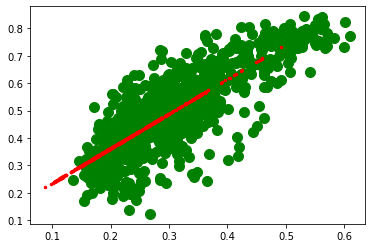

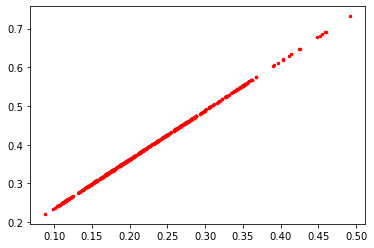

In [16]:
plt.plot(X_test, y_pred, 'r.', markersize=5, label='Prediction')

In [53]:
print(X.shape,y.shape, x.shape,y_pred.shape)

(20, 1) (20,) (1000, 1) (1000,)
